In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as patches

from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
BTC_USD_URL= "/content/drive/MyDrive/Code/Fall 2023 code/BTCUSD(1).csv"

drive.mount('/content/drive', force_remount=True)
BTC_data = pd.read_csv(BTC_USD_URL,header=0, skiprows=[1])
print(BTC_data.shape)

Mounted at /content/drive
(366, 5)


In [ ]:
BTC_data

,Date,Open,High,Low,Close
0,04/09/2024,"71,674","71,975","68,274","68,995"
1,04/08/2024,"69,080","72,695","68,931","71,671"
2,04/07/2024,"68,282","70,285","68,207","69,080"
3,04/06/2024,"67,433","68,498","67,357","68,282"
4,04/05/2024,"68,449","68,731","66,018","67,433"
...,...,...,...,...,...
361,04/14/2023,"30,363","31,020","30,019","30,347"
362,04/13/2023,"29,812","30,607","29,797","30,363"
363,04/12/2023,"30,164","30,500","29,699","29,801"
364,04/11/2023,"29,195","30,549","29,099","30,164"


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = BTC_data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

In [ ]:
US_DXY_URL = "/content/drive/MyDrive/Code/Fall 2023 code/US-DXY(1).csv"
drive.mount('/content/drive', force_remount=True)
DXY_data = pd.read_csv(US_DXY_URL,header=0, skiprows=[1])
print(DXY_data.shape)

Mounted at /content/drive
(261, 5)


In [ ]:
DXY_data

,Date,Open,High,Low,Close
0,04/09/2024,104.12,104.20,103.88,104.15
1,04/08/2024,104.29,104.44,104.10,104.14
2,04/05/2024,104.21,104.69,104.14,104.30
3,04/04/2024,104.23,104.26,103.92,104.12
4,04/03/2024,104.77,104.84,104.23,104.25
...,...,...,...,...,...
256,04/14/2023,101.00,101.75,100.79,101.55
257,04/13/2023,101.47,101.60,100.85,101.01
258,04/12/2023,102.13,102.16,101.45,101.50
259,04/11/2023,102.52,102.52,102.01,102.20


In [ ]:
# Check the column names in your DataFrame
print(BTC_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [ ]:
BTC_data['Date'] = pd.to_datetime(BTC_data['Date'])
DXY_data['Date'] = pd.to_datetime(DXY_data['Date'])

In [ ]:
# Assuming your dataset is named 'BTC_data'
BTC_data['Open'] = BTC_data['Open'].str.replace(',', '').astype(np.float64)
BTC_data['High'] = BTC_data['High'].str.replace(',', '').astype(np.float64)
BTC_data['Low'] = BTC_data['Low'].str.replace(',', '').astype(np.float64)
BTC_data['Close'] = BTC_data['Close'].str.replace(',', '').astype(np.float64)

In [ ]:
# Check the data types of all columns
print(BTC_data.dtypes)
print(DXY_data.dtypes)

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object
Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object


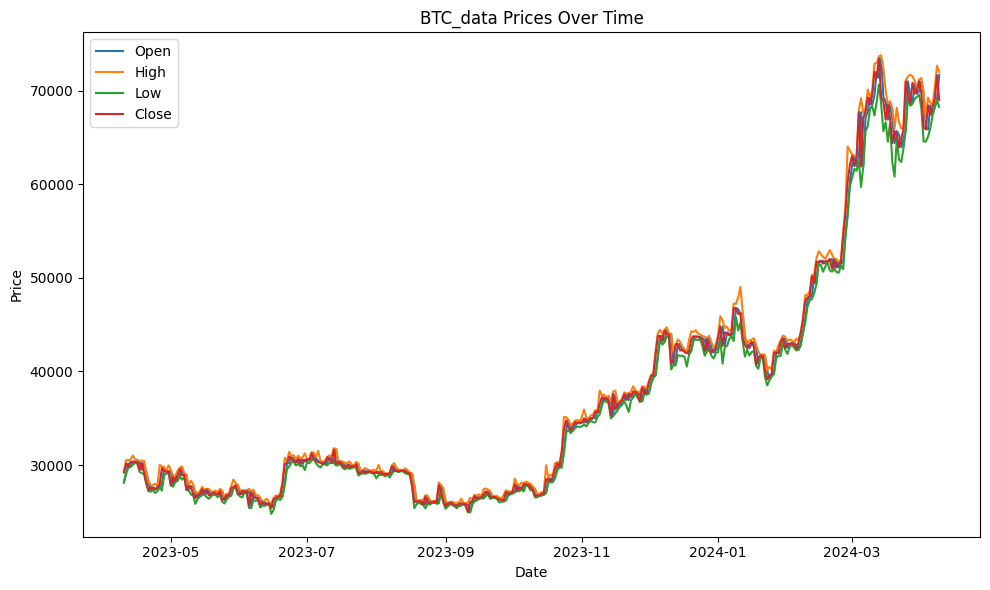

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(BTC_data['Date'], BTC_data['Open'], label='Open')
plt.plot(BTC_data['Date'], BTC_data['High'], label='High')
plt.plot(BTC_data['Date'], BTC_data['Low'], label='Low')
plt.plot(BTC_data['Date'], BTC_data['Close'], label='Close')
plt.title('BTC_data Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

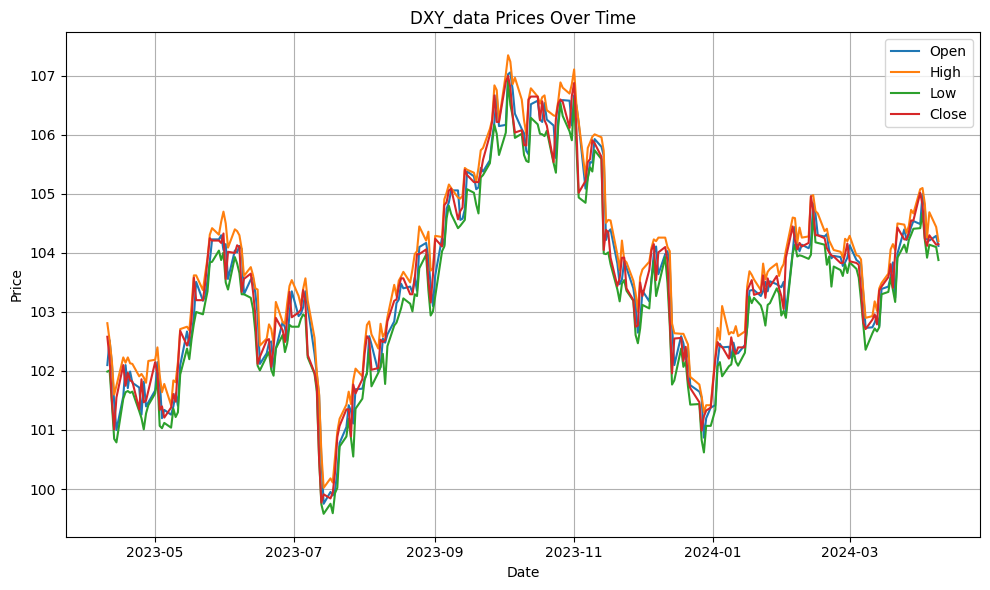

In [ ]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(DXY_data['Date'], DXY_data['Open'], label='Open')
plt.plot(DXY_data['Date'], DXY_data['High'], label='High')
plt.plot(DXY_data['Date'], DXY_data['Low'], label='Low')
plt.plot(DXY_data['Date'], DXY_data['Close'], label='Close')
plt.title('DXY_data Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
start_date = '2023-10-04'
end_date = '2024-04-10'
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

In [ ]:
# Find missing dates in df1
missing_dates_df1 = date_range[~date_range.isin(BTC_data['Date'])]

# Find missing dates in df2
missing_dates_df2 = date_range[~date_range.isin(DXY_data['Date'])]

# Print the missing dates for each dataset
print("Missing dates in df1:")
print(missing_dates_df1)

print("\nMissing dates in df2:")
print(missing_dates_df2)

Missing dates in df1:
DatetimeIndex(['2023-10-07', '2023-10-08', '2023-10-14', '2023-10-15',
               '2023-10-21', '2023-10-22', '2023-10-28', '2023-10-29',
               '2023-11-04', '2023-11-05', '2023-11-11', '2023-11-12',
               '2023-11-18', '2023-11-19', '2023-11-25', '2023-11-26',
               '2023-12-02', '2023-12-03', '2023-12-09', '2023-12-10',
               '2023-12-16', '2023-12-17', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-30', '2024-01-01', '2024-01-06',
               '2024-01-07', '2024-01-13', '2024-01-14', '2024-01-20',
               '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
               '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
               '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
               '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
               '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
               '2024-03-31', '2024-04-06', '2024-04-07'

In [ ]:
# Remove rows from df1 corresponding to missing dates in df2
BTC_data = BTC_data[~BTC_data['Date'].isin(missing_dates_df2)]

In [ ]:
BTC_data.shape

(311, 5)

In [ ]:
DXY_data.shape

(261, 5)

In [ ]:
# Create candlestick trace
candlestick = go.Candlestick(
    x=BTC_data['Date'],
    open=BTC_data['Open'],
    high=BTC_data['High'],
    low=BTC_data['Low'],
    close=BTC_data['Close'],
    name='Candlestick'
)

# Create figure and add candlestick trace
fig = go.Figure(data=[candlestick])

# Customize layout
fig.update_layout(
    title='BTC_data CandleStick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Show the figure
fig.show()

In [ ]:
# Create candlestick trace
candlestick = go.Candlestick(
    x=DXY_data['Date'],
    open=DXY_data['Open'],
    high=DXY_data['High'],
    low=DXY_data['Low'],
    close=DXY_data['Close'],
    name='Candlestick'
)

# Create figure and add candlestick trace
fig = go.Figure(data=[candlestick])

# Customize layout
fig.update_layout(
    title='DXY_data CandleStick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

# Show the figure
fig.show()

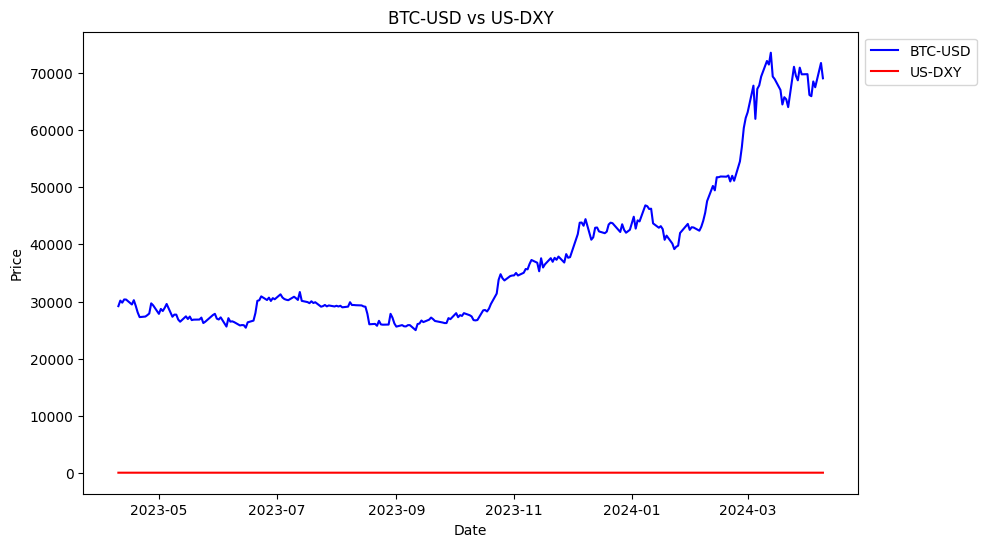

In [ ]:
# Create separate DataFrames for BTC-USD and US-DXY
df_btc = pd.DataFrame({
    'Date': BTC_data['Date'],
    'Close_BTC': BTC_data['Close']
})

df_usdxy = pd.DataFrame({
    'Date': DXY_data['Date'],
    'Close_USDXY': DXY_data['Close']
})

# Merge the two DataFrames on 'Date'
merged_df = pd.merge(df_btc, df_usdxy, on='Date', how='inner')

# Plot BTC-USD and US-DXY on the same chart with different y-axes
plt.figure(figsize=(10, 6))

plt.plot(merged_df['Date'], merged_df['Close_BTC'], color='blue', label='BTC-USD')
plt.plot(merged_df['Date'], merged_df['Close_USDXY'], color='red', label='US-DXY')

plt.title('BTC-USD vs US-DXY')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

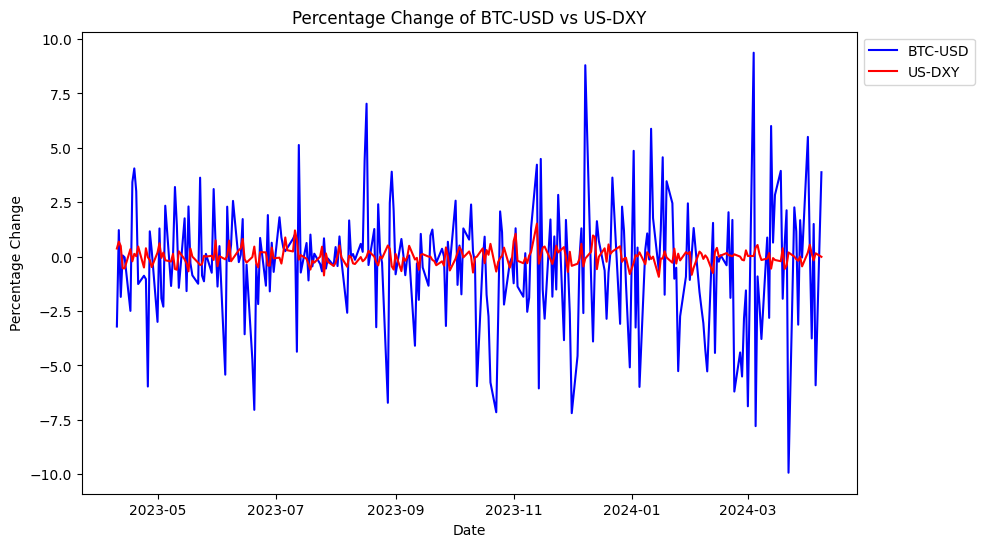

In [ ]:
# Calculate percentage change for BTC-USD and US-DXY
df_btc['BTC_Percentage_Change'] = df_btc['Close_BTC'].pct_change() * 100
df_usdxy['USDXY_Percentage_Change'] = df_usdxy['Close_USDXY'].pct_change() * 100

# Merge the two DataFrames on 'Date'
merged_df = pd.merge(df_btc[['Date', 'BTC_Percentage_Change']], df_usdxy[['Date', 'USDXY_Percentage_Change']], on='Date', how='inner')

# Plot percentage change of BTC-USD and US-DXY
plt.figure(figsize=(10, 6))

plt.plot(merged_df['Date'], merged_df['BTC_Percentage_Change'], color='blue', label='BTC-USD')
plt.plot(merged_df['Date'], merged_df['USDXY_Percentage_Change'], color='red', label='US-DXY')

plt.title('Percentage Change of BTC-USD vs US-DXY')
plt.xlabel('Date')
plt.ylabel('Percentage Change')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
# Calculate correlation coefficient between BTC-USD and US-DXY percentage changes
correlation_coefficient = merged_df['BTC_Percentage_Change'].corr(merged_df['USDXY_Percentage_Change'])

print("Correlation Coefficient between BTC-USD and US-DXY: {:.2f}".format(correlation_coefficient))


Correlation Coefficient between BTC-USD and US-DXY: -0.10


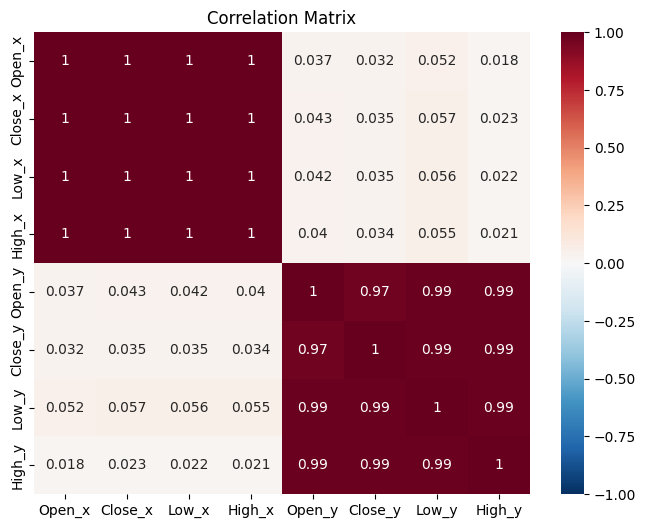

In [ ]:
merged_data = pd.merge(BTC_data, DXY_data, on='Date', how='inner')

# Calculate the correlation between BTC and DXY
correlation_matrix = merged_data[['Open_x', 'Close_x', 'Low_x', 'High_x', 'Open_y', 'Close_y', 'Low_y', 'High_y']].corr()

# Create the correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# **LSTM Model text**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(BTC_data[['Open', 'High', 'Low', 'Close']])

# Sliding window approach
look_back = 30
X, y = [], []
for i in range(len(scaled_data) - look_back - 1):
    X.append(scaled_data[i:(i + look_back), :])
    y.append(scaled_data[i + look_back, :])
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, 4)))
model.add(Dense(4))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

Epoch 1/20
7/7 [==============================] - 2s 14ms/step - loss: 0.0212
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0057
Epoch 3/20
7/7 [==============================] - 0s 14ms/step - loss: 0.0032
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.0026
Epoch 5/20
7/7 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 6/20
7/7 [==============================] - 0s 12ms/step - loss: 0.0017
Epoch 7/20
7/7 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 8/20
7/7 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 9/20
7/7 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 10/20
7/7 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 11/20
7/7 [==============================] - 0s 13ms/step - loss: 0.0014
Epoch 12/20
7/7 [==============================] - 0s 12ms/step - loss: 0.0013
Epoch 13/20
7/7 [==============================] - 0s 14ms/st

2/2 [==============================] - 0s 9ms/step
MSE: 907767.4128, MAE: 768.9813


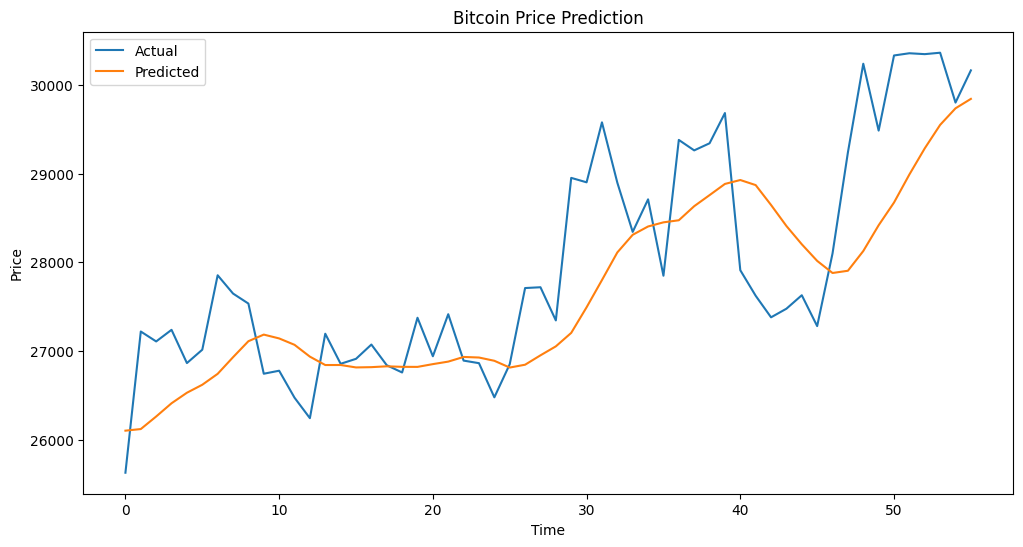

In [ ]:
#Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred)

mse = mean_squared_error(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
print(f'MSE: {mse:.4f}, MAE: {mae:.4f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse[:, 3], label='Actual')
plt.plot(y_pred_inverse[:, 3], label='Predicted')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()